In [ ]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

In [5]:
df_twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
df_twitter_archive_enhanced.shape

(2356, 17)

In [7]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [8]:
df_image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_image_predictions.shape

(2075, 12)

In [10]:
# comment this all

# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_twitter_archive_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [11]:
tweet_data=[]
with open('tweet-json.txt', encoding='utf-8') as json_file:  
     for line in json_file:
            data = json.loads(line)
            tweet_data.append({'tweet_id' : data['id'], 'retweet_count' : data['retweet_count'], 
                           'favorite_count' : data['favorite_count'], 'retweeted' : data['retweeted'],
                           'full_text' : data['full_text']})          

In [12]:
df_tweets_jason = pd.DataFrame(tweet_data, columns=['tweet_id', 'retweet_count', 'favorite_count', 'retweeted', 'full_text'])
df_tweets_jason.head()

,tweet_id,retweet_count,favorite_count,retweeted,full_text
0,892420643555336193,8853,39467,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,False,This is Franklin. He would like you to stop ca...


We have gathered three dataframes,df_archive,df_image and df_tweets.
We will assess each of these one by one for quality issues and tidiness issues.
We will do it visually and programmatically

## Assessing Data

Image Table

In [13]:
df_image_predictions.shape

(2075, 12)

In [14]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
df_image_predictions.sample(5)
# visual assessment shows p1,p2 and p3 are in small cases. It should be title case
# Note: Visual assessment shows underscore inbetween p1,p2 and p3(eg:ice_bear)
# If there is any consistency issue we should remove it.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False
581,678774928607469569,https://pbs.twimg.com/media/CWt-MNIWEAAUC9S.jpg,1,Pembroke,0.194681,True,toy_poodle,0.121821,True,Pomeranian,0.096843,True
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True


In [17]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# tweet_id is int64 we need to change it to string

In [19]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_image_predictions.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [21]:
df_image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
df_image_predictions['img_num'].unique()

array([1, 4, 2, 3])

In [23]:
df_image_predictions.duplicated().sum()

0

In [24]:
df_image_predictions['tweet_id'].duplicated().sum()

0

In [25]:
df_image_predictions['jpg_url'].duplicated().sum()

66

In [26]:
df_image_predictions[df_image_predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [27]:
df_image_predictions[~df_image_predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
df_image_predictions['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [29]:
# Verifiying a duplicated jpg_url
df_image_predictions[df_image_predictions['jpg_url']=='https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True


In [30]:
df_image_predictions[df_image_predictions['jpg_url']=='https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.14995,True,Chesapeake_Bay_retriever,0.047523,True
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.14995,True,Chesapeake_Bay_retriever,0.047523,True


In [31]:
df_image_num=df_image_predictions.select_dtypes('number')

In [32]:
df_image_num

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
0,666020888022790149,1,0.465074,0.156665,0.061428
1,666029285002620928,1,0.506826,0.074192,0.072010
2,666033412701032449,1,0.596461,0.138584,0.116197
3,666044226329800704,1,0.408143,0.360687,0.222752
4,666049248165822465,1,0.560311,0.243682,0.154629
5,666050758794694657,1,0.651137,0.263788,0.016199
6,666051853826850816,1,0.933012,0.045885,0.017885
7,666055525042405380,1,0.692517,0.058279,0.054449
8,666057090499244032,1,0.962465,0.014594,0.007959
9,666058600524156928,1,0.201493,0.192305,0.082086


In [33]:
df_image_num.min()

tweet_id    6.660209e+17
img_num     1.000000e+00
p1_conf     4.433340e-02
p2_conf     1.011300e-08
p3_conf     1.740170e-10
dtype: float64

In [34]:
df_image_num.max()

tweet_id    8.924206e+17
img_num     4.000000e+00
p1_conf     1.000000e+00
p2_conf     4.880140e-01
p3_conf     2.734190e-01
dtype: float64

In [35]:
# checking for any blank url
df_image_predictions[df_image_predictions['jpg_url']==' ']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
df_image_predictions[df_image_predictions['p1']==' ']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
df_image_predictions[df_image_predictions['p2']==' ']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
df_image_predictions[df_image_predictions['p3']==' ']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
df_image_predictions[df_image_predictions['jpg_url']==' ']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
for val in ['p1_conf','p2_conf','p3_conf']:
    print(sum(df_image_predictions[val]<0))

0
0
0


In [41]:
df_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [42]:
# check if it is not a jpg file
for i in range(len(df_image_predictions)):
    img=df_image_predictions['jpg_url'][i][-4:]
    if img!='.jpg':
        print(df_image_predictions['jpg_url'][i][-4:])
        print('not jpg file')

.png
not jpg file
.png
not jpg file


In [43]:
# checking for https

for i in range(len(df_image_predictions)):
    htm=df_image_predictions['jpg_url'][i][:8]
    if htm!='https://':
        print("not https://")

In [44]:
# no of non dog images
sum(df_image_predictions['p1_dog']==False)

543

In [45]:
df_image_predictions[df_image_predictions['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [46]:
df_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [47]:
df_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [48]:
df_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [49]:
# Any confidencce greater than 1?
df_image_predictions[df_image_predictions['p1_conf']>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [50]:
df_image_predictions[df_image_predictions['p2_conf']>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
df_image_predictions[df_image_predictions['p3_conf']>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


json Tweets

In [52]:
# check for the data types,total records and individual column records
df_tweets_jason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
retweeted         2354 non-null bool
full_text         2354 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.9+ KB


In [53]:
# tweet_id is int64 we need to change it to string

In [54]:
# check for minimum values. Is there a negative values in it?
df_tweets_jason.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [55]:
df_tweets_jason.head()

,tweet_id,retweet_count,favorite_count,retweeted,full_text
0,892420643555336193,8853,39467,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,False,This is Franklin. He would like you to stop ca...


In [56]:
df_tweets_jason.tail()

,tweet_id,retweet_count,favorite_count,retweeted,full_text
2349,666049248165822465,41,111,False,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,False,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,False,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,False,This is a western brown Mitsubishi terrier. Up...
2353,666020888022790149,532,2535,False,Here we have a Japanese Irish Setter. Lost eye...


In [57]:
df_tweets_jason.sample(3)

,tweet_id,retweet_count,favorite_count,retweeted,full_text
1512,691090071332753408,385,1867,False,Happy Saturday here's a dog in a mailbox. 12/1...
940,752917284578922496,1790,7592,False,This is Grizzie. She's a semi-submerged Bahrai...
2293,667119796878725120,135,346,False,This is Gabe. He is a southern Baklava. Gabe h...


In [58]:
# checking for any nulls
df_tweets_jason.isna().any()

tweet_id          False
retweet_count     False
favorite_count    False
retweeted         False
full_text         False
dtype: bool

In [59]:

df_tweets_jason.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
retweeted         0
full_text         0
dtype: int64

In [60]:
# checking for any duplicates
sum(df_tweets_jason.duplicated())

0

In [61]:
# checking if retweets count is negative
df_tweets_jason[df_tweets_jason['retweet_count']<0]

,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [62]:
# checking if the favorite_count is negative
df_tweets_jason[df_tweets_jason['favorite_count']<0]

,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [65]:
# check if retweeted is other than True or False
df_tweets_jason[(df_tweets_jason['retweeted']!=True) & (df_tweets_jason['retweeted']!=False)]

,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [66]:
# The above can be also done by the following:
df_tweets_jason['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [67]:
# check for a blank full_text
df_tweets_jason[df_tweets_jason['full_text']==' ']

,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [68]:
# check for the retweed records
df_tweets_jason[df_tweets_jason['retweeted']==True].shape[0]

0

Twitter archive enhanced

In [69]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [70]:
df_twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [71]:
df_twitter_archive_enhanced.sample(3)
# doggo,floofer,pupper,puppo are in different columns. Clubbing in one column should be done

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,None,None,None,None


In [72]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [73]:
# tweet_id is int64 we need to change it to string
# timestamp is a string not datetime datatype
# retweeted_status_timestamp is a string not datetime datatype.
# in_reply_to_status_id,in_reply_to_user_id are floats


In [74]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [75]:
df_twitter_archive_enhanced.shape

(2356, 17)

In [76]:
df_twitter_archive_enhanced.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [77]:
df_twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [78]:
df_twitter_archive_enhanced.duplicated().any()

False

In [79]:
df_twitter_archive_enhanced.duplicated().sum()

0

In [80]:
df_twitter_archive_enhanced.agg({'rating_numerator':['min']})

,rating_numerator
min,0


In [81]:
df_twitter_archive_enhanced.agg({'rating_numerator':['max']})

,rating_numerator
max,1776


In [82]:
df_twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [83]:
df_twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [84]:
df_twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [85]:
df_twitter_archive_enhanced['name'].value_counts() 
# incorrect name 'a'
# dog name has None, It should be converted to NaN.

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Daisy          7
an             7
Buddy          7
Bailey         7
Bella          6
Koda           6
Jax            6
Dave           6
Leo            6
Jack           6
Scout          6
Stanley        6
Rusty          6
Oscar          6
Milo           6
Larry          5
            ... 
Shooter        1
Hanz           1
Strudel        1
Divine         1
Aiden          1
Ike            1
Tedders        1
Mookie         1
Stu            1
Rolf           1
Edgar          1
Miguel         1
Schnozz        1
Kulet          1
Barney         1
Jockson        1
Apollo         1
Ralphson       1
Randall        1
Jordy          1
Terrenth       1
Monty          1
Bobble         1
Chesney        1
Odin           1
Kollin         1
Jerome         1
Hall          

In [86]:
df_twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [87]:
df_twitter_archive_enhanced_num=df_twitter_archive_enhanced.select_dtypes('number')

In [88]:
df_twitter_archive_enhanced_num

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
0,892420643555336193,NaN,NaN,NaN,NaN,13,10
1,892177421306343426,NaN,NaN,NaN,NaN,13,10
2,891815181378084864,NaN,NaN,NaN,NaN,12,10
3,891689557279858688,NaN,NaN,NaN,NaN,13,10
4,891327558926688256,NaN,NaN,NaN,NaN,12,10
5,891087950875897856,NaN,NaN,NaN,NaN,13,10
6,890971913173991426,NaN,NaN,NaN,NaN,13,10
7,890729181411237888,NaN,NaN,NaN,NaN,13,10
8,890609185150312448,NaN,NaN,NaN,NaN,13,10
9,890240255349198849,NaN,NaN,NaN,NaN,14,10


In [89]:
# searching for retweets(for deletions of the retweets)

In [90]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['text'].str.contains('RT @')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [91]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['text'].str.contains('RT @')==True].shape[0]

181

In [92]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['retweeted_status_id'].notna()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [93]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['retweeted_status_id'].notna()==False].shape[0]

2175

In [94]:
# checking through info also gives the same 181 no null. We have to deleted this not null values
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [95]:
# one of the above record when queried in the tweets we get no rows
df_tweets_jason[df_tweets_jason['tweet_id']==888202515573088257]


,tweet_id,retweet_count,favorite_count,retweeted,full_text


In [96]:
# exploring the source column

In [97]:
df_twitter_archive_enhanced['source'].head(2)[0] # We want the source without tags

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

# Quality Issues:
Images Table:
- tweet_id is a float not a string.
- p1,p2,p3 are not in title case.

Tweets Table:
- tweet_id is a float not a string.


Tweeter archive enhanced table:
- tweet_id is a float not a string.
- timestamp is a string not datetime datatype.
- retweeted_status_timestamp is a string not datetime datatype.
- Inaccurate dog name called 'a' found. This is not a standard name.
- Dog name have None. Need to replace this by NaN. Lower case names are not proper nouns. That should be replaced by NaN
- We only want original ratings. Retweets have no ratings. So not null data in retweeted_status_user_id not required.
- in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are to be removed.
- source column has unnecessary tags. 
- in_reply_to_status_id,in_reply_to_user_id are floats. Also they are not required.


# Tidiness Issues:
- doggo,floofer,pupper,puppo should be clubbed together in one column. Remove the original four columns.
- Join tables together to tidy data(To satisfy one of the condition of tidiness(A single        observational unit is stored in multiple tables).


## Cleaning Twitter Archived Enhanced table

In [98]:
# For cleaning the tables we need to make a copy of the original tables so as not to corrupt them.

In [99]:
df_twitter_archive_enhanced_clean=df_twitter_archive_enhanced.copy()

Define: Converting tweet_id datatype from int to string

Code:

In [100]:

df_twitter_archive_enhanced_clean['tweet_id']=df_twitter_archive_enhanced_clean['tweet_id'].astype('object')

Test:

In [104]:
df_twitter_archive_enhanced_clean['tweet_id'].dtype

dtype('O')

Define: Converting timestamp datatype from string to datetime

Code:

In [105]:
df_twitter_archive_enhanced_clean['timestamp']=df_twitter_archive_enhanced_clean['timestamp'].astype('datetime64[ns]')

Test: 

In [106]:
df_twitter_archive_enhanced_clean['timestamp'].dtype

dtype('<M8[ns]')

Define: Converting retweeted_status_timestamp datatype from string to datetime

Code:

In [107]:
df_twitter_archive_enhanced_clean['retweeted_status_timestamp']=df_twitter_archive_enhanced_clean['retweeted_status_timestamp'].astype('datetime64[ns]')

Test: 

In [108]:

df_twitter_archive_enhanced_clean['retweeted_status_timestamp'].dtype

dtype('<M8[ns]')

Define: We will delete the rows having dog name as 'a' as it is not a proper dog name

Code: 

In [109]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [110]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='a'].shape

(55, 17)

In [111]:
df_names_a=df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='a'].index

In [112]:
df_twitter_archive_enhanced_clean.drop(df_names_a,axis=0,inplace=True)

Test:

In [113]:

df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='a'].shape

(0, 17)

In [114]:

df_twitter_archive_enhanced_clean['name'].value_counts() # dog with name 'a' is deleted

None         745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Toby           7
an             7
Buddy          7
Bailey         7
Jack           6
Milo           6
Stanley        6
Oscar          6
Scout          6
Rusty          6
Jax            6
Bella          6
Koda           6
Dave           6
Leo            6
Oakley         5
Sunny          5
            ... 
Hanz           1
Strudel        1
Divine         1
Aiden          1
Ike            1
Tedders        1
Mookie         1
Scruffers      1
Tommy          1
Erik           1
Schnozz        1
Rolf           1
Kulet          1
Barney         1
Jockson        1
Apollo         1
Ralphson       1
Randall        1
Jordy          1
Terrenth       1
Monty          1
Bobble         1
Chesney        1
Odin           1
Kollin         1
Jerome         1
Hall           1
Sprinkles     

Define: Deleting in_reply_to_status_id

Code: 

In [115]:
del df_twitter_archive_enhanced_clean['in_reply_to_status_id']

Test: 

In [116]:

df_twitter_archive_enhanced_clean.head(1)

,tweet_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


Define: Deleting in_reply_to_user_id

Code: 

In [118]:
del df_twitter_archive_enhanced_clean['in_reply_to_user_id']

Test: 

In [119]:
df_twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Define: Segregating retweets in order to delete the non null record

Code: 

In [120]:

df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['retweeted_status_id'].isna()==False]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [121]:
df_twitter_archive_enhanced_clean=df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

In [122]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['retweeted_status_id'].isna()==True]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Test: 

In [123]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['retweeted_status_id'].isna()==False]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Define: After deleting retweets rows, we dont require retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp.
We delete those columns

Code: 

In [124]:
del df_twitter_archive_enhanced_clean['retweeted_status_id']

In [125]:
del df_twitter_archive_enhanced_clean['retweeted_status_user_id']

In [126]:
del df_twitter_archive_enhanced_clean['retweeted_status_timestamp']

Test: 

In [127]:
df_twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [128]:
df_twitter_archive_enhanced_clean['name'].value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Lola            8
Winston         8
the             8
Sadie           8
Toby            7
Daisy           7
an              6
Bella           6
Oscar           6
Stanley         6
Bailey          6
Koda            6
Bo              6
Jax             6
Dave            5
Buddy           5
Rusty           5
Chester         5
Milo            5
Leo             5
Bentley         5
Scout           5
Louis           5
             ... 
Chloe           1
Vinscent        1
Eevee           1
Charl           1
incredibly      1
Winifred        1
Spark           1
Shaggy          1
Philbert        1
Balto           1
Alf             1
Sweet           1
Snoop           1
Chef            1
Blanket         1
Pluto           1
Eve             1
Clifford        1
Tanner          1
Ashleigh        1
Howie           1
Maks            1
Aja             1
Vinnie          1
Akumi     

Define: Removing unnecessary tags in source columns

Code: 

In [129]:
def remove_tags(str1):
    result=re.compile(r'<.*?>')
    return result.sub('',str1)

Test:

In [130]:
# checking the function with a html string
x="<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
remove_tags(x)

'Twitter for iPhone'

In [131]:
df_twitter_archive_enhanced_clean['source']=df_twitter_archive_enhanced_clean['source'].apply(lambda x : remove_tags(x))

In [132]:

df_twitter_archive_enhanced_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [133]:
df_twitter_archive_enhanced_clean['source'].value_counts()

Twitter for iPhone     1990
Vine - Make a Scene      91
Twitter Web Client       28
TweetDeck                11
Name: source, dtype: int64

Define: Replace the None names to NaN for the name column

In [135]:
# query name is 'None'

df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None
35,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,2017-07-12 16:03:00,Twitter for iPhone,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
42,884247878851493888,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None


Code: 

In [136]:
df_twitter_archive_enhanced_clean['name'].replace('None',np.nan,inplace=True)

In [137]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']=='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Test:

In [139]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name']==np.nan] # None is replaced by NaN

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [140]:
df_twitter_archive_enhanced_clean['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
the           8
Toby          7
Daisy         7
Oscar         6
Bailey        6
Stanley       6
Bo            6
an            6
Bella         6
Jax           6
Koda          6
Bentley       5
Dave          5
Leo           5
Milo          5
Louis         5
Rusty         5
Chester       5
Buddy         5
Scout         5
Duke          4
             ..
Randall       1
Flurpson      1
Jordy         1
Terrenth      1
Monty         1
Bobble        1
Chesney       1
Dug           1
Torque        1
Striker       1
Joey          1
Bruiser       1
Rey           1
Ruffles       1
Tuco          1
Molly         1
Grizzie       1
Lance         1
Leela         1
Jazz          1
Kirk          1
Sweets        1
Leonard       1
Clyde         1
Kyro          1
Alexander     1
Meera         1
Blu           1
Kona          1
Emmy          1
Name: name, Length: 954,

Define: Filtering  names in lower case(lower case names are not proper names as seen in our visualization)
and replace it with NaN

Code: 

In [141]:
filt=df_twitter_archive_enhanced_clean['name'].str.islower()==True
df_twitter_archive_enhanced_clean[filt]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
169,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,2016-12-06 19:29:28,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
852,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
924,755206590534418437,2016-07-19 01:04:16,Twitter for iPhone,This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14,10,one,doggo,None,None,None
988,748977405889503236,2016-07-01 20:31:43,Twitter for iPhone,What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None


In [142]:
df_twitter_archive_enhanced_clean.loc[filt,'name']=np.nan

Test:

In [143]:
df_twitter_archive_enhanced_clean[filt]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None
169,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,NaN,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,NaN,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,NaN,None,None,None,None
542,806219024703037440,2016-12-06 19:29:28,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,NaN,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,NaN,None,None,None,None
852,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,NaN,None,None,None,None
924,755206590534418437,2016-07-19 01:04:16,Twitter for iPhone,This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14,10,NaN,doggo,None,None,None
988,748977405889503236,2016-07-01 20:31:43,Twitter for iPhone,What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,NaN,None,None,None,None


## Cleaning Image prediction table

In [144]:
# making a copy of the original
df_image_predictions_clean=df_image_predictions.copy()

Define: Converting tweet_id datatype from into to string

Code: 

In [146]:

df_image_predictions_clean['tweet_id']=df_image_predictions_clean['tweet_id'].astype('object')

Test: 

In [147]:

df_image_predictions_clean['tweet_id'].dtype

dtype('O')

Define: Converting p1,p2,p3 to title case from small letter case

Code: 

In [148]:
df_image_predictions_clean['p1']=df_image_predictions_clean['p1'].str.title()

In [149]:
df_image_predictions_clean['p2']=df_image_predictions_clean['p2'].str.title()

In [150]:
df_image_predictions_clean['p3']=df_image_predictions_clean['p3'].str.title()

Test: 

In [151]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [152]:
# Note: We can also remove the underscore between the dog name if there is any consistency issue.
# If we have the problem we can remove the underscore by the following code:
#df_image_predictions_clean.replace('_',regex=True,replace=True)

## Cleaning jason twitter table


In [153]:
# Making copy of the original
df_tweets_jason_clean=df_tweets_jason.copy()

Define: Converting tweet_id datatype from int to string

Code: 

In [154]:
df_tweets_jason_clean['tweet_id']=df_tweets_jason_clean['tweet_id'].astype('object')

Test:

In [155]:
df_tweets_jason_clean['tweet_id'].dtype

dtype('O')

## Tidying data

Define: Clubbing doggo,pupper,puppo and floofer in one column and delete the original 4 columns 

Code: 

In [156]:
df_twitter_archive_enhanced_clean['doggo'].replace('None','',inplace=True)

In [157]:
df_twitter_archive_enhanced_clean['floofer'].replace('None','',inplace=True)

In [158]:
df_twitter_archive_enhanced_clean['pupper'].replace('None','',inplace=True)

In [159]:
df_twitter_archive_enhanced_clean['puppo'].replace('None','',inplace=True)

In [160]:
df_twitter_archive_enhanced_clean['doggo'].value_counts()

         2033
doggo      87
Name: doggo, dtype: int64

In [161]:
df_twitter_archive_enhanced_clean['floofer'].value_counts()

           2110
floofer      10
Name: floofer, dtype: int64

In [162]:
df_twitter_archive_enhanced_clean['pupper'].value_counts()

          1890
pupper     230
Name: pupper, dtype: int64

In [163]:
df_twitter_archive_enhanced_clean['puppo'].value_counts()

         2095
puppo      25
Name: puppo, dtype: int64

In [164]:
df_twitter_archive_enhanced_clean['dog_stages']=df_twitter_archive_enhanced_clean['doggo']+\
df_twitter_archive_enhanced_clean['pupper']+df_twitter_archive_enhanced_clean['floofer']+df_twitter_archive_enhanced_clean['puppo']

In [165]:
df_twitter_archive_enhanced_clean['dog_stages'].value_counts()

                1780
pupper           220
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stages, dtype: int64

In [166]:
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean['dog_stages']=='doggopupper','dog_stages']='doggo,pupper'

In [167]:
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean['dog_stages']=='doggopuppo','dog_stages']='doggo,puppo'

In [168]:
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean['dog_stages']=='doggofloofer','dog_stages']='doggo,floofer'

In [169]:
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean['dog_stages']=='','dog_stages']=np.nan

In [170]:
df_twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

Test: 

In [171]:
df_twitter_archive_enhanced_clean['dog_stages'].value_counts()

pupper           220
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

In [172]:

df_twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


Define: Merging 3 tables into one.

Code: 

In [173]:
df_temp_clean=pd.merge(df_twitter_archive_enhanced_clean,df_tweets_jason_clean,on='tweet_id',how='inner')

In [174]:
df_master_clean=pd.merge(df_temp_clean,df_image_predictions_clean,on='tweet_id',how='inner')

Test: 

In [175]:
df_master_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


In [176]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 1938
Data columns (total 24 columns):
tweet_id              1939 non-null object
timestamp             1939 non-null datetime64[ns]
source                1939 non-null object
text                  1939 non-null object
expanded_urls         1939 non-null object
rating_numerator      1939 non-null int64
rating_denominator    1939 non-null int64
name                  1350 non-null object
dog_stages            302 non-null object
retweet_count         1939 non-null int64
favorite_count        1939 non-null int64
retweeted             1939 non-null bool
full_text             1939 non-null object
jpg_url               1939 non-null object
img_num               1939 non-null int64
p1                    1939 non-null object
p1_conf               1939 non-null float64
p1_dog                1939 non-null bool
p2                    1939 non-null object
p2_conf               1939 non-null float64
p2_dog                1939 non-nu

Define: Saving the master dataframe

Code: 

In [177]:
df_master_clean.to_csv('twitter_archive_master.csv', index = False), 

(None,)

Test: 

In [178]:
# checking the twitter_archive_master.csv which we have saved above

In [179]:

df_check=pd.read_csv('twitter_archive_master.csv')
df_check.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [180]:
df_check.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'retweet_count', 'favorite_count', 'retweeted', 'full_text', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [181]:
# Analysis of the cleaned datafile in order to derive some interesting insights

In [182]:
# Insight 1: Most common dog

In [183]:
#Top Popular breeds

I have analysed data on the basis of the first predictions and found the following:

Golden Retriever is the most popular breed, Followed by Labrador Retriever.

These dogs have the most tweets and which leads them to most popular breed.

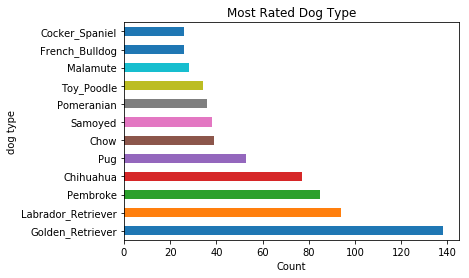

In [184]:

df_dg_type = df_check.groupby('p1').filter(lambda x: len(x) >= 25)

df_dg_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('dog type')
plt.show()
#fg = plt.gcf() 
#fg.savefig('output.png',bbox_inches='tight');

In [185]:
# insight 2: Relationship between ratings and retweet counts


In [186]:
df_check1=df_check[df_check['rating_numerator']<=15]

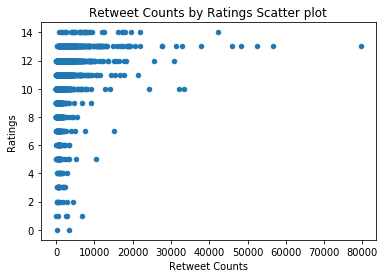

In [187]:
df_check1.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter plot')
plt.show()
#fg = plt.gcf()
#fg.savefig('output3.png',bbox_inches='tight');

As you can see above as the Retweet counts increases the Ratings also increases

In [188]:
# Insight 3: Retweets and favorites


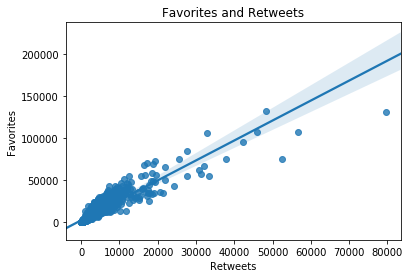

In [189]:

g = sns.regplot(x=df_check['retweet_count'], y=df_check['favorite_count'])
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
#fg = g.get_figure()
#fg.savefig('scatterplot.png');

In [190]:
# There is a positive relationship between retweets and favorites
# As tweets increase so the favorites increase and so the retweets also increase.


In [191]:
df_check['name'].value_counts()

Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Bo            6
Jax           6
Stanley       6
Koda          6
Bella         6
Rusty         5
Louis         5
Bailey        5
Buddy         5
Milo          5
Chester       5
Oscar         5
Dave          5
Leo           5
Scout         5
Phil          4
Bear          4
Gary          4
Scooter       4
             ..
Ralphson      1
Jangle        1
Lorelei       1
Jordy         1
Deacon        1
Monty         1
Bobble        1
Chesney       1
Mary          1
Dug           1
Torque        1
Herschel      1
Ruffles       1
Tuco          1
Roscoe        1
Kendall       1
Lance         1
Leela         1
Joey          1
Bruiser       1
Bobbay        1
Leonard       1
Maddie        1
Kyro          1
Alexander     1
Meera         1
Blu           1
Kona          1
Molly         1
Emmy          1
Name: name, Length: 913,

In [192]:
df_check['source'].value_counts(normalize=True)

Twitter for iPhone    0.981434
Twitter Web Client    0.012893
TweetDeck             0.005673
Name: source, dtype: float64